In [1]:
#colors that I use http://clrs.cc/

In [2]:
import splat
import wisps
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import pandas as pd
%matplotlib inline
import splat.plot as splt
import warnings

import matplotlib as mpl



spectral standards

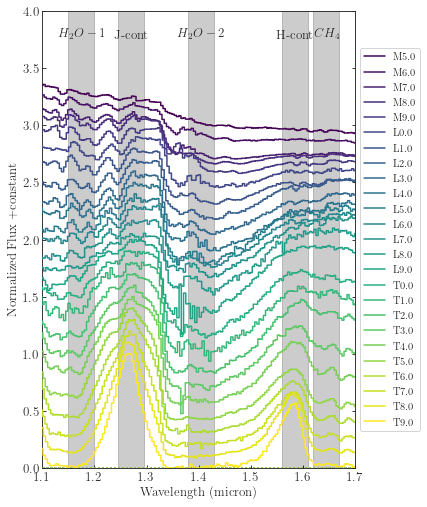

In [3]:
#spectral standards
regions=[[1.246, 1.295],[1.15, 1.20], [1.62,1.67], [1.56, 1.61], [1.38, 1.43]]
st_spts=[splat.typeToNum(x) for x in np.arange(15, 40)]
standards=[splat.getStandard(x) for x in st_spts]
for s in standards: s.normalize()
minima = 15.0
maxima = 40.0
splt.plotSpectrum(standards, figsize=(8, 12),  bands=regions, 
                  xrange=[1.1, 1.7], yrange=[0.0, 4.0]
                  , ylabel='Normalized Flux +constant',
                 bandalpha=0.2,bandlabels=['J-cont', '$H_2O-1$', '$CH_4$', 'H-cont', 
                                          '$H_2O-2$'],
                  legendLocation='outside',
                  #features=['H2O', 'CH4','TiO', 'VO', 'FeH', 'H2', 'KI', 'NaI'],
                  bandlabelpositions=['top', 'top', 'top', 'top', 'top'], fontsize=38, 
                  #alpha=np.arange(15.0, 40.0)/40.0, 
                  labels=st_spts, colors=wisps.Annotator.color_from_spts(st_spts, cmap='viridis'),
                  alpha=14.0,
                  s=14.0,
                  fontscale = 1.0,
                  stack=0.1,
                  grid=False,
                  filename=wisps.OUTPUT_FIGURES+'/standards.pdf')
plt.show()

spex sample

In [4]:
d=wisps.datasets['spex']

In [5]:
d2=wisps.datasets['schneider']

In [6]:
d3=wisps.datasets['manjavacas']

In [7]:
d['snrj']=d.snr1.apply(np.log10)
d2['snrj']=d2.snr1.apply(np.log10)
d3['snrj']=d3.snr1.apply(np.log10)

In [8]:
#d2=d.replace(np.inf, np.nan).replace(-np.inf, np.nan).dropna()

In [9]:
d=d[d.spt.apply(splat.typeToNum)>=17.]

In [10]:
ds=d[d['metallicity_cls']=='d/sd']

In [11]:
#d2

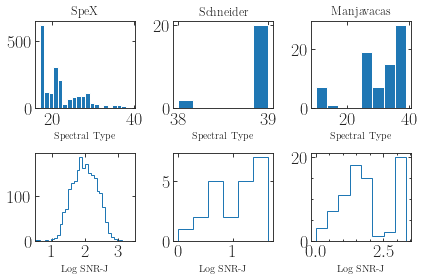

In [12]:
fig, ax=plt.subplots(nrows=2, ncols=3, sharex=False)


h=ax[0][0].hist(d.spt.apply(splat.typeToNum).values, bins='auto', normed=False)
h=ax[1][0].hist(d.snrj.values, bins='auto', normed=False,  histtype='step')

h=ax[0][1].hist(d2.spt.apply(splat.typeToNum).values, bins='auto', normed=False)
h=ax[1][1].hist(d2.snrj.values, bins='auto', normed=False,  histtype='step')

h=ax[0][2].hist(d3.spt.apply(splat.typeToNum).values, bins='auto', normed=False)
h=ax[1][2].hist(d3.snrj.values, bins='auto', normed=False,  histtype='step')

ax[1][0].set_xlim([0.5, 3.5])

for idx in np.arange(3):
    ax[0][idx].set_xlabel('Spectral Type')
    ax[1][idx].set_xlabel('Log SNR-J')

ax[0][0].set_title('SpeX')
ax[0][1].set_title('Schneider')
ax[0][2].set_title('Manjavacas')

for a in np.concatenate(ax):
    a.yaxis.set_ticks_position('both')
    a.xaxis.set_ticks_position('both')

plt.minorticks_on()
plt.tight_layout()
plt.savefig(wisps.OUTPUT_FIGURES+'/spexsample.pdf', bbox_inches='tight')

In [13]:
#df=wisps.datasets['aegis_cosmos'].replace(np.inf, np.nan).dropna(how='any').reindex()
#fig, ax=plt.subplots()

#font = {'family' : 'normal',
#        'weight' : 'normal',
#        'size'   : 14}
#matplotlib.rc('font', **font)
#sns.distplot(df.f_test, ax=ax)
#ax.set_xlabel('F(x)')
#plt.savefig(wisps.OUTPUT_FIGURES+'/snr_f_dist.pdf', bbox_inches='tight')

In [14]:
#len(spex_data)

Filters

In [15]:
import splat.photometry as sphot
t0=splat.Spectrum(splat.STDS_DWARF_SPEX_KEYS['T0.0'])

In [16]:
f140=sphot.filterProfile('NICMOS F140W')

In [17]:
f160=sphot.filterProfile('NICMOS F160W')
f110=sphot.filterProfile('NICMOS F110W')
j_filt=sphot.filterProfile('2MASS J')
h_filt=sphot.filterProfile('2MASS H')

In [18]:
t0.scale(np.nanmax(f140[1]))

In [19]:
t0.shortname

'J1207+0244'

In [20]:
cmap=plt.cm.viridis

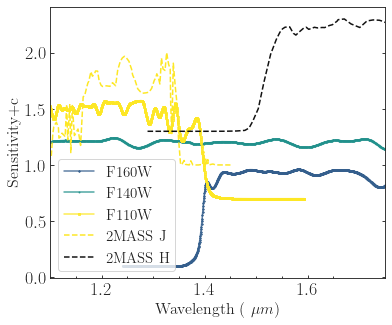

In [21]:
fig, ax=plt.subplots(figsize=(6, 5))
#l1=ax.plot(t0.wave, t0.flux, c='k')
l2=ax.plot( f160[0], 0.1+f160[1], c=cmap(0.3), alpha=0.8, ms=2, marker='*')
l3=ax.plot( f140[0], 0.4+f140[1], c=cmap(.5), alpha=0.8, ms=2, marker='.')
l4=ax.plot( f110[0], 0.7+f110[1], c=cmap(1.0), alpha=0.8, ms=2, marker='s')

l5=ax.plot( j_filt[0], 1.0+j_filt[1], c=cmap(1.5), linestyle='--', ms=2, alpha=1)
ax.plot(h_filt[0], 1.3+h_filt[1], c='#111111', linestyle='--', alpha=1)
ax.set_xlim([1.1, 1.75])
ax.set_xlabel('Wavelength ( $\mu m$)', fontsize=16)
ax.set_ylabel('Sensitivity+c', fontsize=16)

#ax.yaxis.set_ticks_position('both')
#ax.xaxis.set_ticks_position('both')
#ax.tick_params(which='major',direction='inout')
#ax.tick_params(which='minor', direction='in')

ax.set_xticks(np.arange(1.1, 1.7, 0.05), minor=True)
plt.legend(['F160W', 'F140W','F110W','2MASS J ', '2MASS H'],fontsize=15, loc='lower left')
plt.savefig(wisps.OUTPUT_FIGURES+'/filter_profiles.pdf', bbox_inches='tight')

Sky positions 

In [22]:
t=pd.read_csv(wisps.OUTPUT_FILES+'/observation_log.csv').drop_duplicates(subset='POINTING')

In [23]:
#t

In [24]:
t_wisp=t[t.POINTING.str.contains('par*')]
t_hst3d=t[t.POINTING.str.contains('pa*').apply(lambda x: not x)]

In [25]:
#t_hst3d

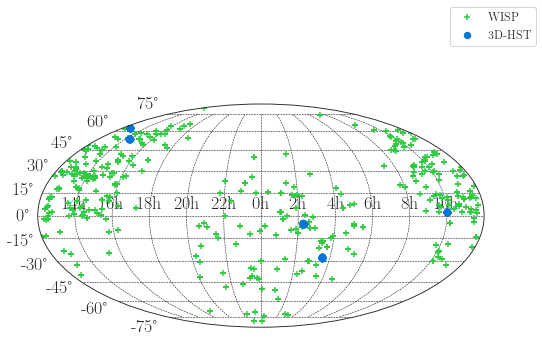

In [26]:
from astropy.coordinates import SkyCoord
import astropy.units as u

coords1=SkyCoord(ra=t_wisp['RA (deg)'],dec=t_wisp['DEC(deg)'], unit=(u.deg, u.deg))
coords2=SkyCoord(ra=t_hst3d['RA (deg)'],dec=t_hst3d['DEC(deg)'], unit=(u.deg, u.deg))

#import astropy.coordinates as coord



#fig = plt.figure(figsize=(8,6))
#ax = fig.add_subplot(111, projection="mollweide")
#ax.scatter(coords2.ra.wrap_at(180*u.degree).radian, coords2.dec.radian, c='k')

mp=splt.plotMap(coords1, coords2, galactic = False, legend=['WISP', '3D-HST'], marker=['+', 'o'], color=['#2ECC40', '#0074D9'], 
             size=[30, 40], alpha=[1.0, 1.0], filename=wisps.OUTPUT_FIGURES+'/fields_skymap.pdf')

This is an illustration of the modified snr

In [27]:
sp=wisps.Spectrum(filename='par32-00079')
sp=sp.splat_spectrum
sp.normalize()
#flag=sp.isEmpty()
snr1=np.array(sp.flux/sp.noise)
snr=snr1[~np.isnan(snr1)]
xgrid=np.linspace(np.nanmin(snr), np.nanmax(snr), len(sp.wave))
cdf=wisps.kde_statsmodels_m(snr, xgrid)

In [28]:
#sp1=wisps.Source(name='aegis-03-G141_17053')
#sp2=wisps.Source(name='Par32_BEAM_79A')

In [29]:
sp1=wisps.Source(name='goodss-01-G141_45889')
sp2=wisps.Source(name='goodsn-24-G141_21552')

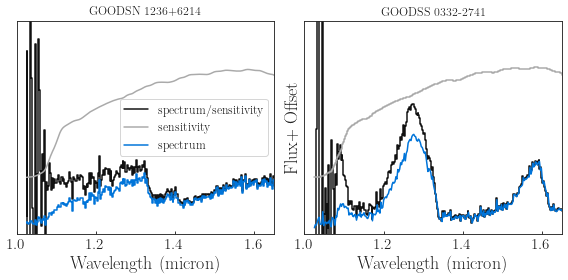

In [42]:
fig, (ax2, ax1)=plt.subplots(1, 2, figsize=(8,4), sharex=False, sharey=True)

ax1.set_yticks([])
    
ax1.set_xlim([1.0, 1.65])
ax1.set_ylim([-0.1, 1.8])
ax1.step(sp1.wave, sp1.flux, c='#111111')
ax1.step(sp1.wave, sp1.sensitivity_curve+.4, c='#AAAAAA', linestyle='-' )
ax1.plot(sp1.wave, (sp1.flux*sp1.sensitivity_curve), c='#0074D9')
#ax1.text(1.1, 1.3, sp1.shortname.upper(), size=15, color='#B10DC9')
ax1.set_title(sp1.shortname.upper())

ax2.set_xlim([1.0, 1.65])
ax2.set_ylim([-0.1, 1.8])
ax2.step(sp2.wave, sp2.flux, c='#111111')
a1=ax2.plot(sp2.wave, sp2.sensitivity_curve+.4, c='#AAAAAA', linestyle='-')
a2=ax2.step(sp2.wave, (sp2.flux*sp2.sensitivity_curve), c='#0074D9')

#plt.
ax1.set_xlabel('Wavelength (micron)', fontsize=18)
ax2.set_xlabel('Wavelength (micron)', fontsize=18)
ax1.tick_params(axis='both', which='major', labelsize=15)
ax2.tick_params(axis='both', which='major', labelsize=15)

ax2.set_title(sp2.shortname.upper())
#ax2.text(1.1, 1.4, sp2.shortname.upper(), size=15, color='#B10DC9')

ax1.set_ylabel('Flux+ Offset', fontsize=18)

#plt.legend( ['Spectrum/Sensitivity', 'Sensitivity', 'Spectrum'], bbox_to_anchor=(0.3, 0.5), fontsize=18)
ax2.legend(['spectrum/sensitivity', 'sensitivity', 'spectrum'], loc='best')
plt.tight_layout()

plt.show()
fig.savefig(wisps.OUTPUT_FIGURES+'/sensitivity_illustration.pdf', bbox_inches='tight', fontsize=16)


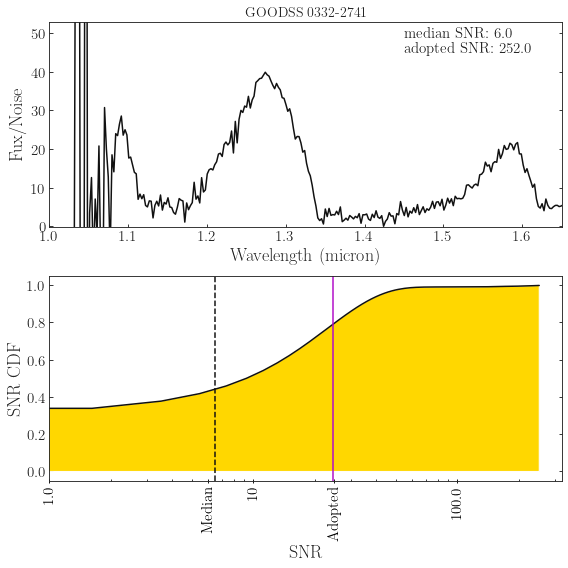

In [31]:
fig,  (ax1, ax)=plt.subplots(nrows=2, figsize=(8, 8))

ax1.plot(sp1.wave, sp1.flux/sp1.noise, c='#111111')
snratio=sp1.flux/sp1.noise
norm=np.nanmax(snratio)
sn=np.array(sp1.flux/sp1.noise)
sn=sn[~np.isnan(sn)]
#ax1.step(sp1.wave, snratio/norm+1.0)
#ax1.step(sp1.wave, sp1.noise, c='#39CCCC')
ax1.set_xlim([1.0, 1.65])
ax1.set_ylim([-0.1, 52.8])
ax1.set_xlabel('Wavelength (micron)', fontsize=18)
ax1.set_ylabel('Fux/Noise', fontsize=18)

ax1.tick_params(axis='both', which='major', labelsize=15)
ax1.text(1.45,49, 'median SNR: {}'.format(round(np.nanmedian(sn))), size=15)
ax1.text(1.45,45, 'adopted SNR: {}'.format(round(sp1.cdf_snr)), size=15)
ax1.set_title(sp1.shortname.upper(), fontsize=14)

ax.set_xscale('log')
xgrid=np.linspace(np.nanmin(sn), np.nanmax(sn), len(sp1.wave))
#ax.axhline(0.9, C='#FFDC00')
sel=np.where((0.8>sp1._snr_histogram) &(sp1._snr_histogram <0.9))[0]
cdf_snr=xgrid[sel[-1]]
ax.plot(xgrid, sp1._snr_histogram, c='#111111')

ax.fill_between( xgrid, np.zeros(len(xgrid)), sp1._snr_histogram, 
                 where=sp1._snr_histogram>=np.zeros(len(xgrid)), facecolor='gold')

ax.axvline(cdf_snr, C='#B10DC9')
ax.axvline(np.nanmedian(sn), c='#111111', linestyle='--')
ax.set_ylabel('SNR CDF', fontsize=18)
ax.set_xlabel('SNR', fontsize=18)
ax.tick_params(axis='both', which='major', labelsize=15)
ax.set_xticks([1.0, round(np.nanmedian(sn)), 10, round(cdf_snr), 100.0])
ax.set_xticklabels([1.0,'Median',  10, 'Adopted' , 100.0])



ax.tick_params(axis='x', colors='k', tickdir='inout', labelbottom='on')
for tick in ax.get_xticklabels():
    tick.set_rotation(90)
plt.tight_layout()

#fig.savefig(wisps.OUTPUT_FIGURES+'/cdf_snr_illustration.pdf', bbox_inches='tight')


Results: list of candidates

In [32]:
#wisps.COMBINED_PHOTO_SPECTRO_DATA

In [33]:
img=wisps.REMOTE_FOLDER+'wisps/archive.stsci.edu/missions/hlsp/wisp/v6.2/par1/hlsp_wisp_hst_wfc3_par1-80mas_f140w_v6.2_drz.fits'

In [34]:
spc_img=wisps.REMOTE_FOLDER+'wisps/archive.stsci.edu/missions/hlsp/wisp/v6.2/par1/hlsp_wisp_hst_wfc3_par1-80mas_g141_v6.2_drz.fits'

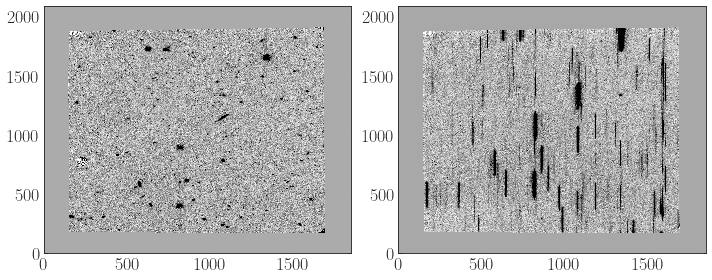

In [35]:
from astropy.io import fits
from astropy.visualization import ZScaleInterval

fig, ax=plt.subplots(ncols=2, figsize=(10, 4))
d0=fits.open(img)[1].data
d1=fits.open(spc_img)[1].data


vmin0, vmax0=ZScaleInterval().get_limits(d0)
grid0=np.mgrid[0:d0.shape[0]:1, 0:d0.shape[1]:1]

vmin1, vmax1=ZScaleInterval().get_limits(d1)
grid1=np.mgrid[0:d1.shape[0]:1, 0:d1.shape[1]:1]

ax[0].pcolormesh(grid0[0], grid0[1], d0, cmap='Greys',
                   vmin=vmin0, vmax=vmax0, rasterized=True, alpha=1.0)

ax[1].pcolormesh(grid1[0], grid1[1], d1, cmap='Greys',
                   vmin=vmin1, vmax=vmax1, rasterized=True, alpha=1.0)

plt.tight_layout()
plt.savefig(wisps.OUTPUT_FIGURES+'/par1.pdf')

In [32]:
import wisps

In [67]:
cds=wisps.datasets['candidates']

In [68]:
cds['spt']=cds.spt.apply(wisps.make_spt_number)

In [71]:
cds=cds[cds.spt>19.]

In [70]:
cdsl=cds[cds.spt.between(20, 30)]

In [69]:
cdst=cds[cds.spt.between(30, 40)]

In [72]:
cdsw=cds[cds.survey.str.startswith('WIS')]

In [73]:
cdsh=cds[~ cds.survey.str.startswith('WIS')]

In [74]:
len(cdsw), len(cdsh),

(32, 15)

In [75]:
len(cdsl), len(cdst)

(36, 12)

In [76]:
len(cdsw[cdsw.spt.between(30, 40)])

8

In [84]:
#cdst.sort_values(by='distance')

In [83]:
cdst.columns

Index(['snr1', 'snr2', 'cdf_snr', 'snr3', 'snr4', 'H_2O-1/J-Cont',
       'H_2O-2/H_2O-1', 'H-cont/H_2O-1', 'CH_4/H_2O-1', 'H_2O-2/J-Cont',
       'H-cont/J-Cont', 'CH_4/J-Cont', 'H-cont/H_2O-2', 'CH_4/H_2O-2',
       'CH_4/H-Cont', 'grism_id', 'spex_chi', 'line_chi', 'spt', 'star_flag',
       'class_star', 'F110', 'F140', 'F160', 'RA', 'DEC', 'survey', 'x',
       'f_test', 'pointing', 'exposure', 'f_test_cdf'],
      dtype='object')